In [1]:
import pandas as pd
pd.options.display.max_columns = None
import plotly.express as px
import os
import numpy as np

In [2]:
# Init DF
model_metrics_df = pd.DataFrame([])

# Load files with new metrics
metrics_path = '/home/hhughes/Documents/Master_Thesis/Project/workspace/models/Model_Metrics_RI'
model_metrics = os.listdir(metrics_path)
for mm in model_metrics:
    with open(os.path.join(metrics_path, mm), 'r') as file:
        try:
            temp_df = pd.read_csv(file)
            temp_df['Parameter_file'] = [pf.split("/")[-1].split(".")[0] for pf in temp_df.Parameters_file_path.values]
            print(mm, 'file loaded correctly')
        except:
            print('\nERROR!!!! Failed to load file: ',mm,'---------------------------------!\n')
        model_metrics_df = pd.concat((model_metrics_df, temp_df), ignore_index=True)
        
model_metrics_df.Bias = model_metrics_df.Bias.abs()
# Set correct order of columns
columns = temp_df.columns
model_metrics_df = model_metrics_df[columns]

XC_RI_test2.csv file loaded correctly
BL_RI_test1.csv file loaded correctly
XC_RI.csv file loaded correctly
RN_RI_test2.csv file loaded correctly
XC_RI_test1.csv file loaded correctly
BL_RI_test3.csv file loaded correctly
BL_RI.csv file loaded correctly
RN_RI_test3.csv file loaded correctly
RN_RI_test1.csv file loaded correctly
XC_RI_test3.csv file loaded correctly
RN_RI.csv file loaded correctly
BL_RI_test2.csv file loaded correctly


In [3]:
mask = (model_metrics_df.Set == 'val')
mask &= (model_metrics_df.CMA_size == 0)
vis_cols = ['Model', 'Parameter_file', 'Loss', 'Epoch', 'N_Epochs', 'Conv_L1_reg', 'Conv_L2_reg', 'Dense_L1_reg', 'Dense_L2_reg', 'Bias_l2_reg', 'PreTrained', 'Aug_Zoom_mode', 'Bias', 'Std', 'R2', 'MAE', 'CMA_size']
model_metrics_df[vis_cols][mask].sort_values(by=['MAE', 'Bias', 'Std'], ascending=True)

,Model,Parameter_file,Loss,Epoch,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,Bias_l2_reg,PreTrained,Aug_Zoom_mode,Bias,Std,R2,MAE,CMA_size
26,Xception,XC_RI,huber,459,600,0,0,0,0,0,1,random_uniform,2.6913,41.4176,0.5570,31.6359,0
62,baseline_CNN,BL_RI_test3,huber,592,600,0,0,0,0,0,0,random_uniform,3.6163,42.7102,0.5275,31.7839,0
134,baseline_CNN,BL_RI_test2,huber,411,600,0,0,0,0,0,0,random_uniform,6.6731,43.6025,0.4996,32.1491,0
122,ResNet50V2,RN_RI,huber,575,600,0,0,0,0,0,1,random_uniform,2.8157,44.3080,0.4931,32.2028,0
98,ResNet50V2,RN_RI_test1,huber,519,600,0,0,0,0,0,1,random_uniform,5.9804,42.6683,0.5226,32.2629,0
50,Xception,XC_RI_test1,huber,428,600,0,0,0,0,0,1,random_uniform,3.5053,43.4322,0.5117,32.2768,0
110,Xception,XC_RI_test3,huber,283,600,0,0,0,0,0,1,random_uniform,4.1967,45.0535,0.4734,32.9236,0
14,baseline_CNN,BL_RI_test1,huber,413,600,0,0,0,0,0,0,random_uniform,4.2286,44.2022,0.4929,32.9538,0
74,baseline_CNN,BL_RI,huber,483,600,0,0,0,0,0,0,random_uniform,4.2057,45.5125,0.4627,33.2068,0
86,ResNet50V2,RN_RI_test3,huber,362,600,0,0,0,0,0,1,random_uniform,3.1154,45.3151,0.4694,33.2691,0


In [9]:
mask = (model_metrics_df.Set == 'val')
mask &= (model_metrics_df.CMA_size == 0)
#mask &= (model_metrics_df.Model.str.contains('ResNet50V2'))
#mask &= (model_metrics_df.Parameter_file.str.contains('test3|test4'))
mask &= (model_metrics_df.Conv_L1_reg >= 0.1)

model_metrics_df[vis_cols][mask].sort_values(by=['MAE'], ascending=True)

,Model,Parameter_file,Loss,Epoch,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,Bias_l2_reg,PreTrained,Aug_Zoom_mode,Bias,Std,R2,MAE,CMA_size
278,baseline_CNN,BL_test4,huber,965,1350,0.1,0.0,0.0010,0.010,0.0,0,random_uniform,4.7748,41.6856,0.5472,30.5967,0
386,Xception,Xception_test9,huber,615,1350,0.1,0.0,0.0005,0.005,0.0,1,random_uniform,3.1371,43.3389,0.5144,30.7600,0
266,Xception,Xception_test10,mean_absolute_error,442,1350,0.1,0.0,0.0005,0.005,0.0,1,random_uniform,1.4322,42.1463,0.5427,31.1500,0
542,baseline_CNN,BL_test10,mean_absolute_error,632,1350,0.1,0.0,0.0005,0.005,0.0,0,random_uniform,2.6957,41.5187,0.5548,31.2970,0
398,baseline_CNN,BL_test11,huber,1025,1350,0.5,0.0,0.0005,0.005,0.0,0,random_uniform,1.9482,42.8952,0.5258,31.3061,0
290,ResNet50V2,RN50V2_test6,huber,335,450,0.1,0.0,0.0000,0.000,0.0,0,random_uniform,2.1795,43.0384,0.5224,31.3362,0
338,baseline_CNN,BL_test5,huber,1038,1350,1.0,0.0,0.0000,0.010,0.0,0,random_uniform,3.4984,43.0292,0.5207,31.3557,0
182,Xception,Xception_test3,huber,534,850,0.1,0.0,0.0000,0.000,0.0,0,random_uniform,4.2551,41.9419,0.5429,31.4491,0
326,baseline_CNN,BL_test9,huber,1122,1350,0.1,0.0,0.0005,0.005,0.0,0,random_uniform,5.6513,41.9599,0.5390,31.7498,0
410,Xception,Xception_test11,huber,357,1350,0.5,0.0,0.0005,0.005,0.0,1,random_uniform,8.6451,42.6401,0.5131,31.8599,0


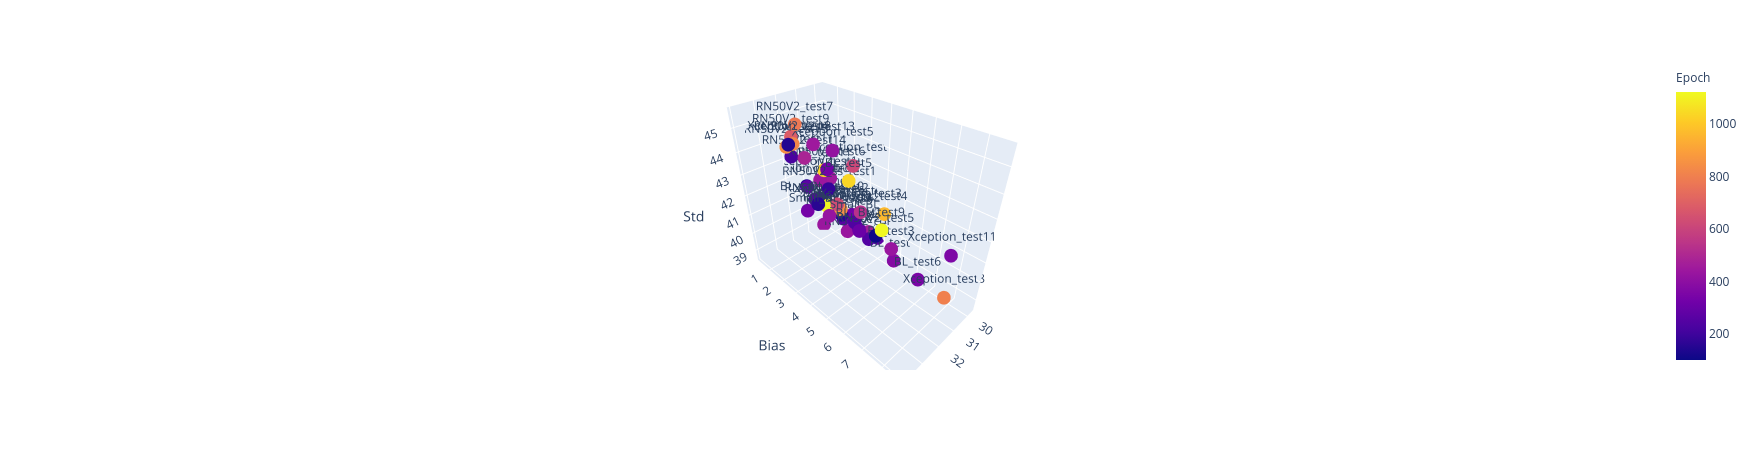

In [11]:
mask = np.ones(model_metrics_df.shape[0]).astype(np.bool)
mask &= model_metrics_df.Set == 'val' 
#mask &= model_metrics_df.R2 > 0.55
#mask &= model_metrics_df.MAE < 35
mask &= model_metrics_df.CMA_size == 0

temp_df = model_metrics_df[mask]

fig = px.scatter_3d(temp_df, 
                    x='MAE', y='Bias', z='Std',
                    text='Parameter_file',
                    #color=temp_df['Bias_l2_reg'],
                    #color=temp_df['Bias_l2_reg'].astype(str),
                    color='Epoch'
                   )

fig.show()

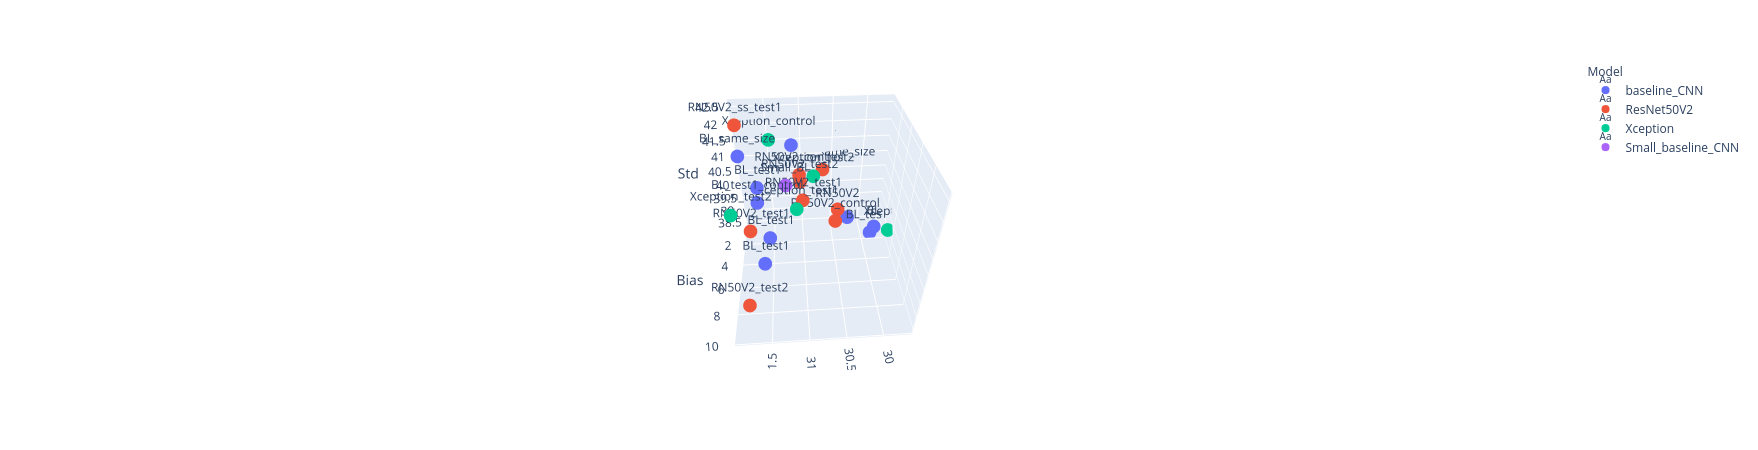

In [8]:
mask = (model_metrics_df.Set == 'val') & (model_metrics_df.MAE < 32)
temp_df = model_metrics_df[mask]

fig = px.scatter_3d(temp_df, 
                    x='MAE', y='Bias', z='Std',
                    text='Parameter_file',
                    #color=temp_df['CMA_size'].astype(str))
                    color='Model')
fig.show()

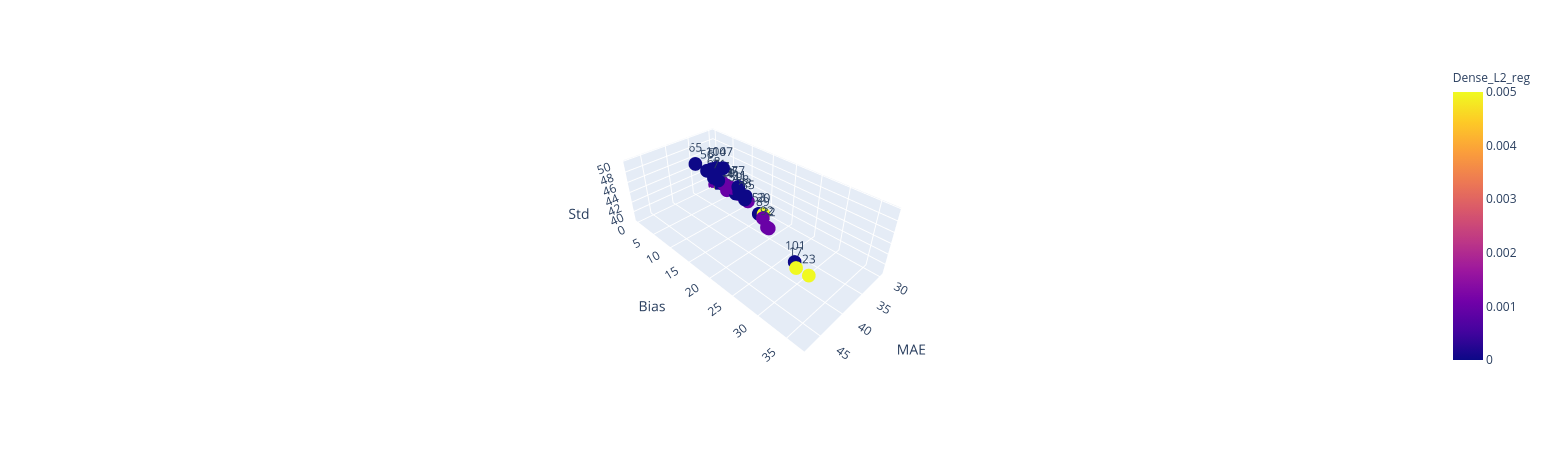

In [7]:
fig = px.scatter_3d(model_metrics_df[mask].reset_index(), 
                    x='MAE', y='Bias', z='Std',
                    text='index',
                    color='Dense_L2_reg')
fig.show()

In [12]:
model_metrics_df.loc[[26, 50, 2]].sort_values(by=['MAE', 'Bias', 'Std'])

,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,PreTrained,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
50,ResNet50V2,huber,0.001,450,0,0,0.0000,0.000,1,val,3.2001,39.9941,0.5860,30.4753,1605.4481,29.9800,0,30.4753,0.0,301,/storage/groups/ml01/code/andres.becker/master...,RN50V2
2,ResNet50V2,huber,0.001,450,0,0,0.0000,0.000,1,val,0.7306,40.6330,0.5753,30.6607,1647.1150,30.1656,0,30.6607,0.0,240,/storage/groups/ml01/code/andres.becker/master...,RN50V2_same_size
26,ResNet50V2,huber,0.001,450,0,0,0.0001,0.001,1,val,3.8909,40.6012,0.5722,31.0042,1659.1368,30.5067,0,31.0042,0.0,287,/storage/groups/ml01/code/andres.becker/master...,RN50V2_test1


In [8]:
mask = (model_metrics_df.Set == 'val') & (model_metrics_df.Model == 'Xception') #& (model_metrics_df.CMA_size == 0)
model_metrics_df[mask].sort_values(by=['MAE', 'Bias', 'Std'])

,Model,Loss,lr,N_Epochs,Conv_L1_reg,Conv_L2_reg,Dense_L1_reg,Dense_L2_reg,PreTrained,Set,Bias,Std,R2,MAE,MSE,Huber,CMA_size,CMA,CMA_Std,Epoch,Parameters_file_path,Parameter_file
158,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,3.6691,39.2976,0.5994,29.6838,1553.5901,29.1902,0,29.6838,0.0000,274,/storage/groups/ml01/code/andres.becker/master...,Xception
164,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,3.6691,39.2976,0.5994,29.6838,1553.5901,29.1902,21,33.8687,3.0378,274,/storage/groups/ml01/code/andres.becker/master...,Xception
38,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,1.9758,40.7789,0.5713,30.8244,1662.3310,30.3288,0,30.8244,0.0000,142,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
170,Xception,mean_absolute_error,0.001,450,0,0,0.0001,0.001,1,val,4.8500,40.6505,0.5690,31.0957,1671.5178,30.5983,0,31.0957,0.0000,121,/storage/groups/ml01/code/andres.becker/master...,Xception_test1
122,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,0.8852,41.6933,0.5527,31.4630,1734.4144,30.9654,0,31.4630,0.0000,273,/storage/groups/ml01/code/andres.becker/master...,Xception_control
44,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,6.2217,41.0416,0.5568,31.9265,1718.5701,31.4279,21,33.9753,2.2525,248,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
47,Xception,huber,0.001,450,0,0,0.0000,0.000,0,val,6.2217,41.0416,0.5568,31.9265,1718.5701,31.4279,31,34.2062,2.5426,248,/storage/groups/ml01/code/andres.becker/master...,Xception_test2
161,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.4726,44.3642,0.4599,34.1139,2094.4859,33.6180,11,32.3624,1.9564,277,/storage/groups/ml01/code/andres.becker/master...,Xception
125,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.2742,43.3902,0.4830,34.1206,2004.7269,33.6232,11,33.5292,1.0396,392,/storage/groups/ml01/code/andres.becker/master...,Xception_control
131,Xception,huber,0.001,450,0,0,0.0000,0.000,1,val,11.2398,43.2415,0.4866,34.1534,1991.1080,33.6564,31,34.2581,2.4560,274,/storage/groups/ml01/code/andres.becker/master...,Xception_control
